<a href="https://colab.research.google.com/github/Kinnaruo/DeepLearning/blob/main/Week%203/CNN_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize

In [2]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.CIFAR10(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

train_loader_pt = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader_pt = DataLoader(test_dataset, batch_size=1000, shuffle=False)

(x_train_tf, y_train_tf), (x_test_tf, y_test_tf) = tf.keras.datasets.cifar10.load_data()
y_train_tf = y_train_tf.flatten()
y_test_tf = y_test_tf.flatten()
x_train_tf, x_test_tf = x_train_tf / 255.0, x_test_tf / 255.0

100%|██████████| 170M/170M [00:04<00:00, 39.0MB/s]


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# TensorFlow

In [3]:
# TensorFlow MLP
mlp_tf = models.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Tensorflow CNN
cnn_tf = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(10, activation='softmax')
])

for model in [mlp_tf, cnn_tf]:
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

mlp_tf.fit(x_train_tf, y_train_tf, epochs=10, validation_data=(x_test_tf, y_test_tf))
cnn_tf.fit(x_train_tf, y_train_tf, epochs=10, validation_data=(x_test_tf, y_test_tf))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.2817 - loss: 2.0147 - val_accuracy: 0.3875 - val_loss: 1.7286
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.3978 - loss: 1.6859 - val_accuracy: 0.4155 - val_loss: 1.6261
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4306 - loss: 1.5882 - val_accuracy: 0.4430 - val_loss: 1.5596
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.4479 - loss: 1.5361 - val_accuracy: 0.4237 - val_loss: 1.6055
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4671 - loss: 1.4960 - val_accuracy: 0.4559 - val_loss: 1.5351
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.4796 - loss: 1.4545 - val_accuracy: 0.4545 - val_loss: 1.5210
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.4872 - loss: 1.4338 - val_accuracy: 0.4674 - val_loss: 1.4889
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.4962 -

# PyTorch

In [4]:
# PyTorch MLP
class MLP_PT(nn.Module):
    def __init__(self):
        super(MLP_PT, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

# PyTorch CNN
class CNN_PT(nn.Module):
    def __init__(self):
        super(CNN_PT, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

mlp_pt = MLP_PT()
cnn_pt = CNN_PT()

def train_pt(model, train_loader, epochs=10, lr=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}: Loss = {total_loss:.4f}")

train_pt(mlp_pt, train_loader_pt)
train_pt(cnn_pt, train_loader_pt)

Epoch 1: Loss = 1280.7730
Epoch 2: Loss = 1114.5815
Epoch 3: Loss = 1028.9744
Epoch 4: Loss = 954.9885
Epoch 5: Loss = 891.3524
Epoch 6: Loss = 833.1068
Epoch 7: Loss = 773.3122
Epoch 8: Loss = 721.5752
Epoch 9: Loss = 661.1690
Epoch 10: Loss = 615.3301
Epoch 1: Loss = 1037.7334
Epoch 2: Loss = 725.4343
Epoch 3: Loss = 597.2713
Epoch 4: Loss = 492.4219
Epoch 5: Loss = 397.6449
Epoch 6: Loss = 305.4209
Epoch 7: Loss = 225.7048
Epoch 8: Loss = 156.6136
Epoch 9: Loss = 112.0355
Epoch 10: Loss = 80.7443


# Matriks Evaluasi

In [5]:
def evaluate_tf_model_np(model, x_test, y_test):
    probs = model.predict(x_test)
    preds = np.argmax(probs, axis=1)
    y_true_onehot = label_binarize(y_test, classes=np.arange(10))

    print("Accuracy :", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds, average='macro'))
    print("Recall   :", recall_score(y_test, preds, average='macro'))
    print("F1 Score :", f1_score(y_test, preds, average='macro'))
    print("AUC      :", roc_auc_score(y_true_onehot, probs, multi_class='ovr'))

def evaluate_pt(model, loader):
    model.eval()
    y_true, y_pred, y_proba = [], [], []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            preds = np.argmax(probs, axis=1)
            y_proba.extend(probs)
            y_true.extend(labels.numpy())
            y_pred.extend(preds)

    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_proba = np.array(y_proba)
    y_true_onehot = label_binarize(y_true, classes=np.arange(10))

    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall   :", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score :", f1_score(y_true, y_pred, average='macro'))
    print("AUC      :", roc_auc_score(y_true_onehot, y_proba, multi_class='ovr'))


In [6]:
def plot_roc_tf(model, x_test, y_test, model_name):
    y_pred_proba = model.predict(x_test)
    y_test_bin = label_binarize(y_test, classes=list(range(10)))
    fpr, tpr, aucs = {}, {}, {}
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        aucs[i] = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {aucs[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_roc_pt(model, loader, model_name):
    model.eval()
    all_labels, all_probs = [], []
    with torch.no_grad():
        for inputs, labels in loader:
            outputs = model(inputs)
            probs = torch.softmax(outputs, dim=1).cpu().numpy()
            all_probs.append(probs)
            all_labels.extend(labels.cpu().numpy())
    y_score = np.vstack(all_probs)
    y_test_bin = label_binarize(all_labels, classes=list(range(10)))
    fpr, tpr, aucs = dict(), dict(), dict()
    for i in range(10):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        aucs[i] = roc_auc_score(y_test_bin[:, i], y_score[:, i])
    plt.figure(figsize=(10, 8))
    for i in range(10):
        plt.plot(fpr[i], tpr[i], label=f"Class {i} (AUC = {aucs[i]:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


📊 Evaluasi MLP (TensorFlow)
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy : 0.4756
Precision: 0.4838146472655784
Recall   : 0.4756
F1 Score : 0.47188540261437845
AUC      : 0.8746984333333332

📊 Evaluasi CNN (TensorFlow)
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Accuracy : 0.6967
Precision: 0.6973965949632447
Recall   : 0.6967000000000001
F1 Score : 0.6946663390205333
AUC      : 0.9507212277777779

📊 Evaluasi MLP (PyTorch)
Accuracy : 0.5353
Precision: 0.5364172148039963
Recall   : 0.5353
F1 Score : 0.5317096037749717
AUC      : 0.8894776666666667

📊 Evaluasi CNN (PyTorch)
Accuracy : 0.7184
Precision: 0.7222833284955561
Recall   : 0.7183999999999999
F1 Score : 0.7190307086114894
AUC      : 0.9573005
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


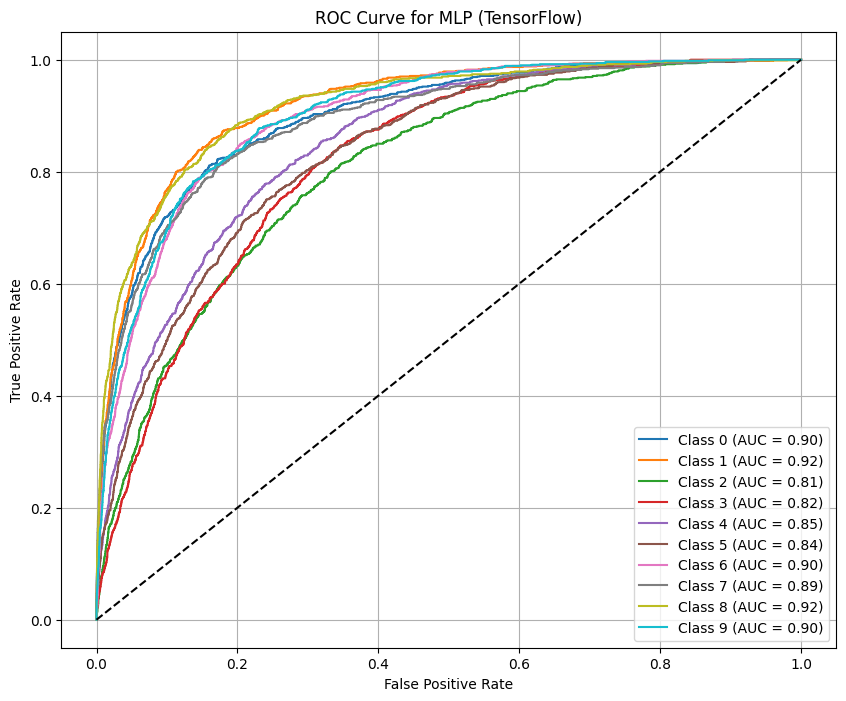

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


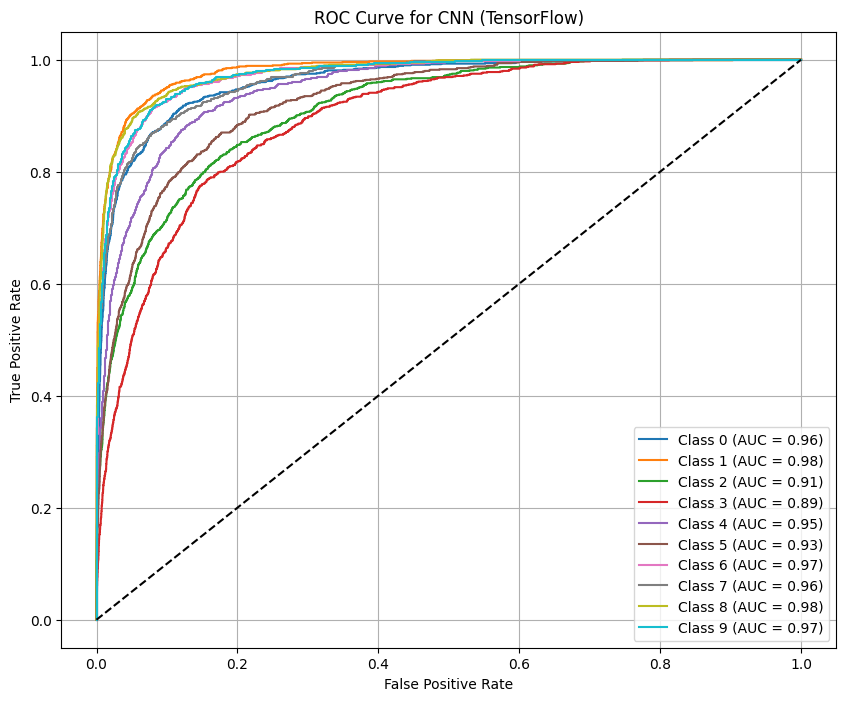

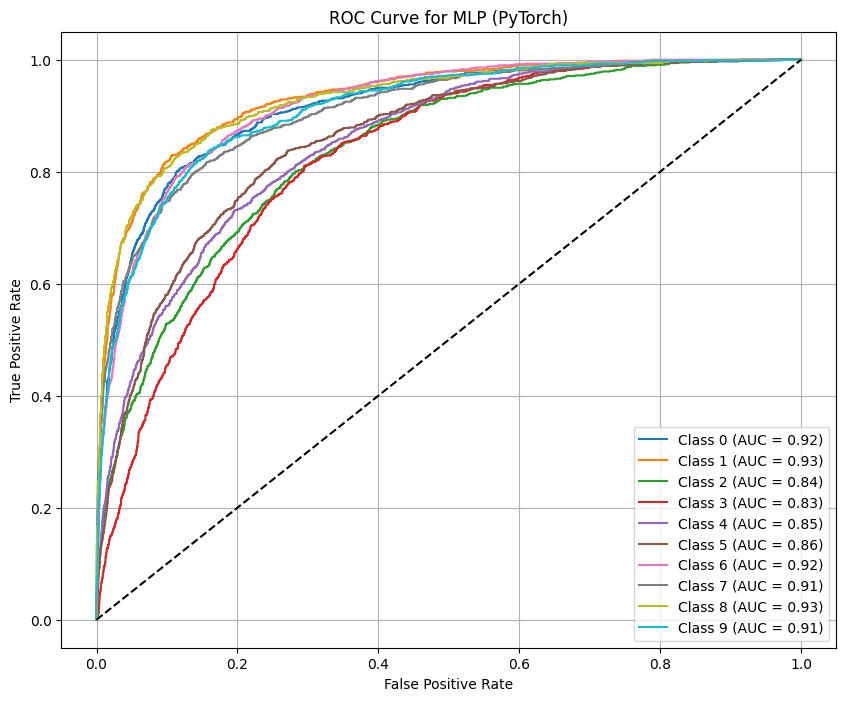

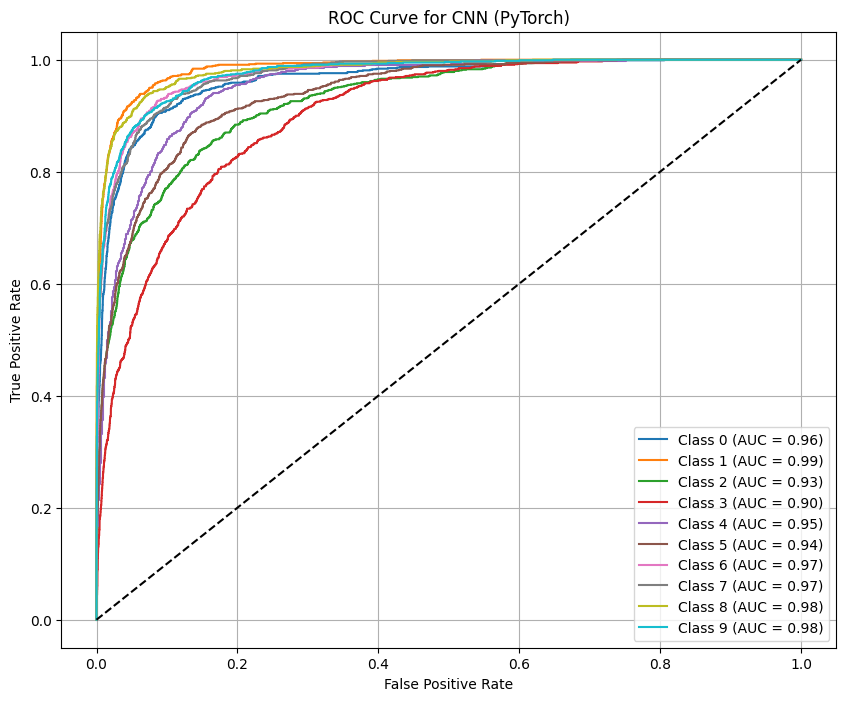

In [7]:
print("\n📊 Evaluasi MLP (TensorFlow)")
evaluate_tf_model_np(mlp_tf, x_test_tf, y_test_tf)

print("\n📊 Evaluasi CNN (TensorFlow)")
evaluate_tf_model_np(cnn_tf, x_test_tf, y_test_tf)

print("\n📊 Evaluasi MLP (PyTorch)")
evaluate_pt(mlp_pt, test_loader_pt)

print("\n📊 Evaluasi CNN (PyTorch)")
evaluate_pt(cnn_pt, test_loader_pt)

plot_roc_tf(mlp_tf, x_test_tf, y_test_tf, "MLP (TensorFlow)")
plot_roc_tf(cnn_tf, x_test_tf, y_test_tf, "CNN (TensorFlow)")
plot_roc_pt(mlp_pt, test_loader_pt, "MLP (PyTorch)")
plot_roc_pt(cnn_pt, test_loader_pt, "CNN (PyTorch)")

# Matriks Evaluasi
## **Accuracy**
Accuracy mengukur seberapa sering model membuat prediksi yang benar dibandingkan dengan total data.

$$
Accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

Di mana:  
- $TP$ = True Positive  
- $TN$ = True Negative  
- $FP$ = False Positive  
- $FN$ = False Negative  

Semakin tinggi **accuracy**, semakin baik performa model secara keseluruhan.

## **Precision**
Precision mengukur seberapa banyak prediksi positif yang benar dibandingkan dengan total prediksi positif.

$$
Precision = \frac{TP}{TP + FP}
$$

Precision tinggi berarti model jarang salah dalam memprediksi kelas positif. Berguna ketika **false positive** harus diminimalkan, misalnya dalam **deteksi kanker**.

## **Recall**
Recall mengukur seberapa banyak sampel positif yang benar-benar terdeteksi oleh model.

$$
Recall = \frac{TP}{TP + FN}
$$

Recall tinggi berarti model tidak melewatkan banyak sampel positif. Sangat penting dalam **deteksi penyakit atau penipuan**, di mana **false negative** harus diminimalkan.

##**F1 Score**
F1 Score adalah rata-rata harmonik antara Precision dan Recall. Berguna saat dataset tidak seimbang.

$$
F1\ Score = 2 \times \frac{Precision \times Recall}{Precision + Recall}
$$

F1 Score tinggi berarti keseimbangan yang baik antara Precision dan Recall.

## **ROC dan AUC**
ROC (**Receiver Operating Characteristic**) adalah kurva yang menunjukkan trade-off antara **True Positive Rate (TPR)** dan **False Positive Rate (FPR)**.

$$
TPR = \frac{TP}{TP + FN}
$$

$$
FPR = \frac{FP}{FP + TN}
$$

Jika nilai semakin mendekati 1, semakin bagus modelnya. Sedangkan jika nilai di bawah 0.5, model tersebut lebih buruk dari tebakan acak.